In [1]:
import sys
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch

In [2]:
path='/Users/Dominic/Lamat/SN2021sjt/sjt_trilogy/'
img='2021sjt_RGB.fits'
wcs_img='ierg27010_drc.fits'

In [3]:
img_hst = get_pkg_data_filename(path+img)
img_wcs = get_pkg_data_filename(path+wcs_img)

In [4]:
fits.info(img_hst), fits.info(img_wcs)

Filename: /Users/Dominic/Lamat/SN2021sjt/sjt_trilogy/2021sjt_RGB.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 ImageHDU         7   (4127, 4387)   uint8   
  2                1 ImageHDU         7   (4127, 4387)   uint8   
  3                1 ImageHDU         7   (4127, 4387)   uint8   
Filename: /Users/Dominic/Lamat/SN2021sjt/sjt_trilogy/ierg27010_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     857   ()      
  1  SCI           1 ImageHDU        90   (4127, 4387)   float32   
  2  WHT           1 ImageHDU        45   (4127, 4387)   float32   
  3  CTX           1 ImageHDU        40   (4127, 4387)   int32   
  4  HDRTAB        1 BinTableHDU    559   4R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 4A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 19A, 4A,

(None, None)

In [4]:
hdu_img1 = fits.open(img_hst)[1]
hdu_img2 = fits.open(img_hst)[2]
hdu_img3 = fits.open(img_hst)[3]

data1=hdu_img1.data
data2=hdu_img2.data
data3=hdu_img3.data

hdu_wcs = fits.open(img_wcs)[1]

In [5]:
wcs = WCS(hdu_wcs.header)
stack=np.dstack((data1,data2,data3))


def compass(self, x, y, size):
        """Add a compass to indicate the north and east directions.

        Parameters
        ----------
        x, y : float
            Position of compass vertex in axes coordinates.
        size : float
            Size of compass in axes coordinates.

        """
        xy = x, y
        scale = self.wcs.pixel_scale_matrix
        scale /= np.sqrt(np.abs(np.linalg.det(scale)))
        return [self.annotate(label, xy, xy + size * n, self.transAxes, self.transAxes, color='white',ha='center', va='center',fontsize=30,arrowprops=dict(color='white',arrowstyle='<-', shrinkA=0.0, shrinkB=0.0))
                for n, label, ha, va in zip(scale, 'EN',['right', 'center'],['center', 'bottom'])]

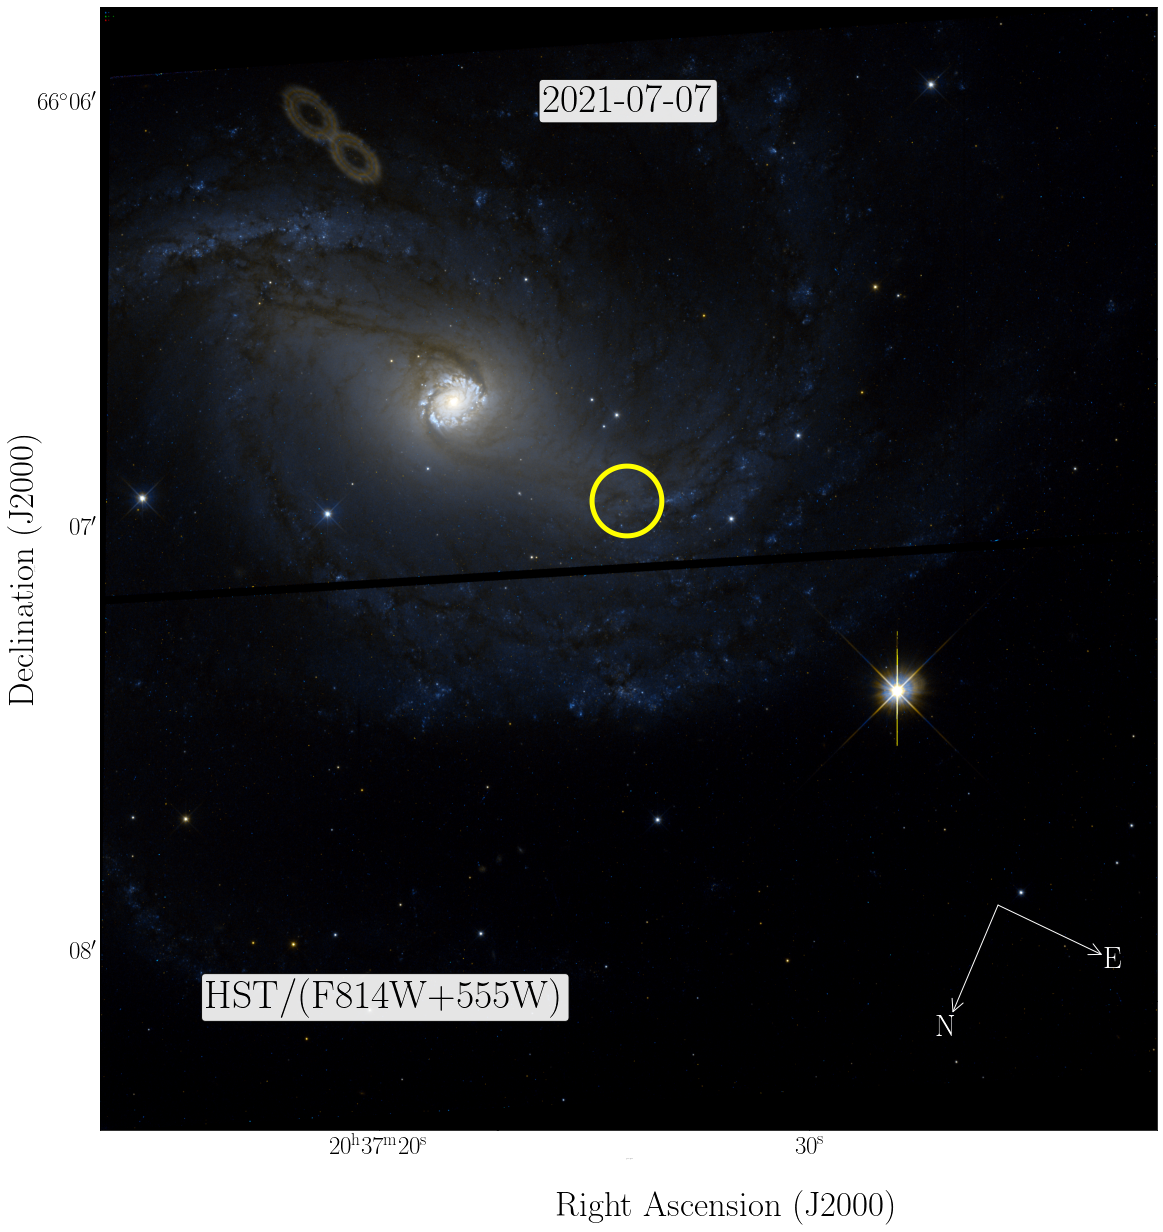

In [8]:
%matplotlib inline
from matplotlib.patches import Circle

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.axes_size import Fixed, Scaled
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],              # LaTeX default is 10pt font.            # Make the legend/label fonts a little smaller
    "pgf.preamble": r"\usepackage[ut f8x]{inputenc} \usepackage[T1]{fontenc}"   
}
 # use utf8 fonts becasue your computer can handle it :)
     # plots will be generated using this preamble
mpl.rcParams.update(pgf_with_latex)

    
    
fig = plt.figure(figsize=(25,12),facecolor='white')
gs = GridSpec(1, 1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=wcs)



#add cut out
#img_png=plt.imread('/Users/Dominic/Lamat/SN2021sjt/sjt_trilogy/2021sjt_perfect.png')
#img_cutout = img_png[400:800, 400:800]



norm = ImageNormalize(stretch=SqrtStretch())

#ax1.imshow(data1,cmap='Greys', origin='lower',norm=norm, vmin=np.percentile(data1,0.1), vmax=np.percentile(data1*2,75))
ax1.imshow(stack)
#ax1.scatter(309.3645044, 66.1090157, transform=ax1.get_transform('fk5'), s=300,
#           edgecolor='red', facecolor='none')
#c = Circle((309.3645044, 66.1090157), 2, edgecolor='yellow', facecolor='none',transform=ax1.get_transform('fk5'))
#ax1.add_patch(c)
r = SphericalCircle((309.3300000 * u.deg, 66.1064111 * u.deg), 0.0015 * u.degree,lw=5,
                     edgecolor='yellow', facecolor='none',
                     transform=ax1.get_transform('fk5'))

ax1.add_patch(r)

ax1.text(0.5, 0.9, r'2021-07-07',transform=ax1.transAxes,verticalalignment='bottom',\
         horizontalalignment='center',color='black', fontsize=40,fontname='font.serif  : cm',\
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1',alpha=0.9))
ax1.text(0.1, 0.1, r'HST/(F814W+555W)',transform=ax1.transAxes,verticalalignment='bottom',\
         horizontalalignment='left',color='black', fontsize=40,fontname='font.serif  : cm',\
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1',alpha=0.9))

compass(ax1,0.85,0.2,0.12)

norm = ImageNormalize(stretch=SqrtStretch())

ax1.set_xticklabels([])
ax1.set_ylabel('',fontsize=0)
ax1.set_xlabel('',fontsize=0)
ax1.tick_params(axis='both',labelsize=25)
ax1.tick_params(direction="in")

plt.subplots_adjust(wspace=0.24)
plt.subplots_adjust(hspace=-0.1)
plt.subplots_adjust(left=0.04)
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(top=1.0)
plt.subplots_adjust(bottom=-0.3)

fig.text(0.5, -0.4, 'Right Ascension (J2000)', ha='center',fontsize=35)
fig.text(0.1, 0.35, 'Declination (J2000)', va='center', rotation='vertical',fontsize=35)



plt.savefig('2021sjt_rgb.png',dpi=400,bbox_inches='tight',transparent=False)